## Lab 2: Clustering ##

The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A custom description of the features can be found at this link: (https://drive.google.com/file/d/0BycRP8EC1WVVUmo5d3kwTWlDYlk/view). 

If, at any place, you wish to include a comment or a discussion of your code/results, please add a Text cell below your answer/code. A text cell can be added by clicking on '+TEXT' in the upper left corner.


#Environment Setup
Run this cell to setup your environment.

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')



#DOWNLOADING DATASET
!wget http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
!unzip yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviews.csv')
df = pd.read_csv('yelp_reviewers.csv')
print(df.shape)
df.dropna().describe()

print('....SETUP COMPLETE....')

--2019-02-14 08:27:03--  http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviewers.zip
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12350863 (12M) [application/zip]
Saving to: ‘yelp_reviewers.zip.7’

yelp_reviewers.zip. 100%[===================>]  11.78M  1.31MB/s    in 13s     

2019-02-14 08:27:16 (911 KB/s) - ‘yelp_reviewers.zip.7’ saved [12350863/12350863]

Archive:  yelp_reviewers.zip
replace yelp_reviewers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Dataset Downloaded: yelp_reviews.csv
(171639, 43)
....SETUP COMPLETE....


### Question 1 ###

Choose an implementation of k-means. Which one have you used? (Scikit-learn, custom, other)



### ANSWER: ### I choose Scikit-learn. Used it before a little bit




---


### Question 2 ###
What is the best choice of k according to the silhouette metric for clustering q4-q6 (# of cool, funny, useful votes). Only consider 2 <= k <= 8.  

NOTE: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters, the prefered approach for this Lab is to treat the empty cluster as a “singleton” leaving it empty with a single point placeholder.


In [0]:
# YOUR CODE HERE
df2=df[["q4","q5","q6"]].values
len(df2)*0.3
X=df2[np.random.choice(len(df2), 51492, replace=False)]
best_k=0
maxs=0
for i in range(2,9):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  score= silhouette_score(X, kmeans.labels_)
  if score> maxs:
    maxs=score
    best_k=i
best_k, maxs

(2, 0.9982563354617981)

***

### Question 3 ###
Answer question 2 but using the log of the features (q7-q10)



In [0]:
# YOUR CODE HERE
X1=df.dropna()[["q7","q8","q9","q10"]].values
best_k2=0
maxs2=0
for i in range(2,9):
  kmeans2 = KMeans(n_clusters=i, random_state=0).fit(X1)
  score2= silhouette_score(X1, kmeans2.labels_)
  if score2> maxs2:
    maxs2=score2
    best_k2=i
best_k2,maxs2

(2, 0.41758974023928846)

### ANSWER: 2###

***

### Question 4 ###
Answer question 2 but using the percentage of the features (q11-q13)



In [0]:
# YOUR CODE HERE
 
X2=df.dropna()[["q11","q12","q13"]].values
best_k3=0
maxs3=0
for i in range(2,9):
  kmeans3 = KMeans(n_clusters=i, random_state=0).fit(X2)
  score3= silhouette_score(X2, kmeans3.labels_)
  if score3> maxs3:
    maxs3=score3
    best_k3=i
best_k3,maxs3

(8, 0.43705212819815525)

### ANSWER: 8###

***

### Question 5 ###
Inspect the [best] clustering generated from question 4

#### 5.a ####
**Question**: List the number of data points in each cluster (eg. C1: 2,000 C2: 4,200 etc)

In [0]:
freq=kmeans3.labels_.tolist()
import collections
counter=collections.Counter(freq)
counter


Counter({0: 2449,
         1: 1960,
         2: 1412,
         3: 4349,
         4: 4933,
         5: 2090,
         6: 2875,
         7: 4137})

#### 5.b ####
**Question**: Were there clusters that represented very funny but useless reviewers?  If so, print them.

**Answer**:  Yes there is a cluster with #2 that represents the very funny but useless reviews

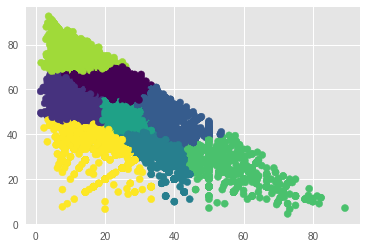

[[44.87164557 19.86064108 35.26808902]
 [13.46876468 11.79936192 74.73276672]
 [20.40174221 53.84484419 25.75324363]
 [26.89403634 25.28386155 47.82186063]
 [32.78900466 33.53682141 33.66774579]
 [16.21217225 37.86160287 45.92551675]
 [32.98291826 13.03431652 53.98209391]
 [18.2122445  19.93890795 61.8505122 ]]


labels
2    14
dtype: int64

In [0]:
# YOUR CODE HERE

plt.scatter(df.dropna()[["q11","q12","q13"]].iloc[:, 1], df.dropna()[["q11","q12","q13"]].iloc[:, 2], c=kmeans3.labels_,cmap='viridis_r',label=kmeans3.labels_)
plt.show()
df2=df.dropna()[["q11","q12","q13"]]
df2["labels"]=kmeans3.labels_
centers=kmeans3.cluster_centers_
print(centers)
df2.loc[(df2['q12'] > 60) & (df2['q13']  <=10)].groupby("labels").size()





### ANSWER: Yes there is a cluster with #2 that represents the very funny but useless reviews###

#### 5.c ####
**Question**: How many reviewers were in the cluster that represented relatively equal strength in all voting categories (assuming such a cluster exists in your clustering)?  

**Answer**:4

In [0]:
# YOUR CODE HERE
df2.loc[(df2['q12'] ==33.33 ) & (df2['q13']  ==33.33) & (df2['q11'] ==33.33) ].groupby("labels").size()


labels
4    2956
dtype: int64

### ANSWER: ### Cluster #4 represent equal strength in voting categories. There are 4933 in that clusters. Among the 4933 reviews, there are roughly 2956 reviews  represented relatively equal strength in all voting categories 33.33% in all funny, useful, and cool votes. 

***

### Question 6 ###
Cluster the dataset using $k = 5$ and using features q7-q13 (log and % type votes) and q14 (most active year feature) and the natural log of q15 (avg review chars)

In [0]:
# YOUR CODE HERE
 
X2=df.dropna()[["q7","q8","q9","q10","q11","q12","q13","q14","q15"]]
X2["q15"]=np.log(X2["q15"])
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(X2)
score4= silhouette_score(X2, kmeans5.labels_)


### ANSWER: ###

#### 6.a ####
**Question**: What is the silhouette metric for this clustering?   
You may use the max, as you did in question 2. For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [0]:
# YOUR CODE HERE
score4= silhouette_score(X2, kmeans5.labels_)
score4

0.36637543664870653

### ANSWER:  0.36637543664870653###

#### 6.b ####
**Question**: What was the average “number of reviews per reviewer (q3)” among the points in each of the clusters (eg. C1: 1.4 C2: 4.2 C3: 3.4 etc)

In [0]:
# YOUR CODE HERE
df6=df.dropna()[["q3"]]
df6["labels"]=kmeans5.labels_
df6.groupby("labels").mean()

,q3
labels,
0,6.743173
1,8.541341
2,4.986265
3,4.903124
4,8.336215


### ANSWER: {C0: 6.743173, C1: 8.541341, C2: 4.986265, C3: 4.903124, C4:8.336215}###



***

### Question 7 ###
Cluster the dataset using the features described in question 6 + every group’s question 16 features (you may drop features with high incidents of -Inf / blank / or NaN values). It is suggested that you perform some form of normalization on these question 16 features so as not to over bias the clustering towards the larger magnitude features.

#### Data Cleansing and Normalization ####
Check how many null values there are in each column.

In [0]:
# YOUR CODE HERE
df_clean=df.drop(['q3', 'q4', 'q5', 'q6'], axis=1, inplace=False)
df_clean["q15"]=np.log(df_clean["q15"])
df_clean.isnull().sum()

user_id         0
q7              0
q8         117853
q9         122162
q10         81153
q11         71282
q12         71282
q13         71282
q14             0
q15             0
q16a            0
q16b            0
q16c            0
q16d            0
q16e            0
q16f            0
q16g            0
q16h            0
q16i            0
q16j            0
q16k            0
q16l            0
q16m            0
q16n            0
q16o            0
q16p            0
q16q            0
q16r            0
q16s            0
q16t            0
q16u            0
q16v            0
q16w            0
q16x            0
q16y            0
q16z            0
q16aa           0
q16ab       47594
q16ac           0
dtype: int64

It looks like q8 - q13 and q16ab have a lot of null values, especially q8 and q9. Let's see what the impact is of removing some of these columnsbefore removing any columns

In [0]:
# YOUR CODE HERE
df_clean=df_clean.drop(['q8', 'q9'], axis=1, inplace=False)
df_clean.isnull().sum()


user_id        0
q7             0
q10        81153
q11        71282
q12        71282
q13        71282
q14            0
q15            0
q16a           0
q16b           0
q16c           0
q16d           0
q16e           0
q16f           0
q16g           0
q16h           0
q16i           0
q16j           0
q16k           0
q16l           0
q16m           0
q16n           0
q16o           0
q16p           0
q16q           0
q16r           0
q16s           0
q16t           0
q16u           0
q16v           0
q16w           0
q16x           0
q16y           0
q16z           0
q16aa          0
q16ab      47594
q16ac          0
dtype: int64

By removing 2 features, we double the number of rows remaining. That's pretty good.  
Preprocess categorical variables to dummy values.

In [0]:
#YOUR CODE HERE
df_clean["q16t"]=pd.get_dummies(df_clean[["q16t"]]).iloc[:,:1]
df_clean["q16s"]=pd.get_dummies(df_clean[["q16s"]]).iloc[:,:1]
df_clean=df_clean.rename(index=str, columns={"q16t": "q16t_no", "q16s": "q16s_experienced"})
df_clean.head()

,user_id,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,...,q16t_no,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
0,--1Y03CEKR3WDbBjYnsW7A,0.00,NaN,NaN,NaN,NaN,6,7.080868,0,0.000000,...,1,4.00,14,5,0.000000,213.000000,0,0,0.000000,5.000000
1,--2QZsyXGz1OhiD4-0FQLQ,1.10,0.0,0.0,0.0,100.0,9,5.030438,0,0.577350,...,1,1.00,19,14,0.000000,21.833333,1,0,0.333333,4.666667
2,--82_AVgRBsLw6Dhy8sEnA,0.00,NaN,NaN,NaN,NaN,3,6.785588,0,0.000000,...,1,3.00,31,4,0.002275,165.000000,0,0,0.000000,4.000000
3,--8A9o_NeGyt_3kzlXtSdg,1.10,0.0,0.0,0.0,100.0,10,6.219934,1,2.309401,...,1,0.00,8,11,0.002242,61.500000,0,0,0.333333,3.666667
4,--8WbseBk1NjfPiZWjQ-XQ,1.39,NaN,NaN,NaN,NaN,11,7.298107,0,2.061553,...,1,0.25,28,11,0.000444,287.500000,0,0,0.000000,2.750000


Now normalize the remaining features.

In [0]:
from sklearn import preprocessing
# YOUR CODE HERE
for i in df_clean.columns[1:-1]:  
  if i == "q16t_no" or i == "q16s_experienced":
    continue 
  df_clean[i] = preprocessing.scale(df_clean[i].astype('float64'))
df_clean.head()

,user_id,q7,q10,q11,q12,q13,q14,q15,q16a,q16b,...,q16t_no,q16u,q16v,q16w,q16x,q16y,q16z,q16aa,q16ab,q16ac
0,--1Y03CEKR3WDbBjYnsW7A,-0.953411,NaN,NaN,NaN,NaN,-1.181783,1.253492,-0.512560,-0.779110,...,1,5.677804,-0.633071,-0.424753,-0.496789,1.851027,-0.337182,-0.202415,-0.398114,5.000000
1,--2QZsyXGz1OhiD4-0FQLQ,0.412088,-0.970154,-0.804632,-0.708244,1.171629,0.217967,-1.315264,-0.512560,-0.066353,...,1,0.877610,-0.288606,0.131740,-0.496789,-0.829235,0.861226,-0.202415,-0.280242,4.666667
2,--82_AVgRBsLw6Dhy8sEnA,-0.953411,NaN,NaN,NaN,NaN,-2.581532,0.883568,-0.512560,-0.779110,...,1,4.077739,0.538109,-0.486585,-0.237286,1.178040,-0.337182,-0.202415,-0.398114,4.000000
3,--8A9o_NeGyt_3kzlXtSdg,0.412088,-0.970154,-0.804632,-0.708244,1.171629,0.684550,0.174923,0.273854,2.071920,...,1,-0.722454,-1.046428,-0.053758,-0.241089,-0.273086,-0.337182,-0.202415,-0.280242,3.666667
4,--8WbseBk1NjfPiZWjQ-XQ,0.772083,NaN,NaN,NaN,NaN,1.151133,1.525646,-0.512560,1.765943,...,1,-0.322438,0.331431,-0.053758,-0.446100,2.895557,-0.337182,-0.202415,-0.398114,2.750000


#### 7.a ####
**Question**: Using the silhouette metric, what was the best k?  

**Answer**:  

In [0]:
# YOUR CODE HERE
Y=df_clean.copy().dropna().iloc[:,1:]
Y=Y.reset_index().drop("index",axis=1)
Ydata=Y.values
Y2=Ydata[np.random.choice(len(Y), 25000, replace=False)]

best_k7=0
maxs7=0
for i in range(7,10):
  kmeans7 = KMeans(n_clusters=i, random_state=0).fit(Y2)
  score7= silhouette_score(Y2, kmeans7.labels_)
  if score7> maxs7:
    maxs7=score7
    best_k7=i
best_k7,maxs7

(9, 0.12475016339661221)

### ANSWER:  9###

#### 7.b ####
**Question**: Using the the sum of within cluster variance metric with the elbow method what was the best k?  
**Answer**:  

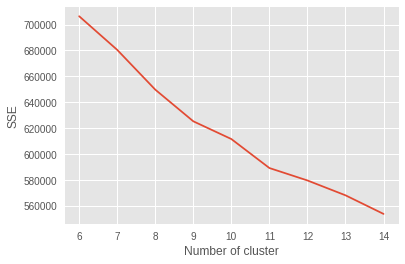

In [0]:
# YOUR CODE HERE
sse={}
for i in range(6,15):
  kmeans7 = KMeans(n_clusters=i, random_state=0).fit(Y2)
  sse[i] = kmeans7.inertia_

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### ANSWER: The best K is 9###

### Question 8 ###
For this question please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe in short the question, and how clustering can answer that question.


### ANSWER:  ###
Question: Were there clusters that represent high excitement score and high percentage of funny votes among features between all the votes?
Answer: We can use k-means algorism of features q11-13 and q16h excitiment score to find the silhouette metric to determine the best K for the clusters. Through plotting the centroid, we can see if there's clusters that represent high excitement score and high percentage of funny votes.  


## Bonus question (+20%) - Reviewer overlap:
Create a dataset with f reviewers as the rows and business_ids as the columns (there are a lot) where the feature value is is ‘1’ if the reviewer has written a review for that business and ‘0’ if not. Use the methods described in this assignment to answer the question of how much overlap of businesses reviewed exists among reviewers in this dataset. Print head() of this newly created dataset.

In [0]:
# YOUR CODE HERE
#DOWNLOADING DATASET
!wget http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv
#!unzip yelp_reviews.zip
print('Dataset Downloaded: yelp_reviews.csv')
review=pd.read_csv('yelp_reviews.csv')
print(df.head())

--2019-02-14 08:27:33--  http://people.ischool.berkeley.edu/~zp/course_datasets/yelp_reviews.csv
Resolving people.ischool.berkeley.edu (people.ischool.berkeley.edu)... 128.32.78.16
Connecting to people.ischool.berkeley.edu (people.ischool.berkeley.edu)|128.32.78.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376638166 (359M) [text/csv]
Saving to: ‘yelp_reviews.csv.2’

yelp_reviews.csv.2  100%[===================>] 359.19M  1001KB/s    in 2m 1s   

2019-02-14 08:29:34 (2.98 MB/s) - ‘yelp_reviews.csv.2’ saved [376638166/376638166]

Dataset Downloaded: yelp_reviews.csv
                  user_id  q3  q4  q5  q6    q7  q8  q9  q10  q11    ...     \
0  --1Y03CEKR3WDbBjYnsW7A   1   0   0   0  0.00 NaN NaN  NaN  NaN    ...      
1  --2QZsyXGz1OhiD4-0FQLQ   3   0   0   1  1.10 NaN NaN  0.0  0.0    ...      
2  --82_AVgRBsLw6Dhy8sEnA   1   0   0   0  0.00 NaN NaN  NaN  NaN    ...      
3  --8A9o_NeGyt_3kzlXtSdg   3   0   0   1  1.10 NaN NaN  0.0  0.0    ...      
4  

In [0]:
review['value'] = 1
#Kernel will crash if increases in sampling size
review2 = review[:1000].pivot_table(values='value', index="user_id", columns = "business_id", aggfunc = np.sum)
review2=review2.fillna(0).astype(int)
from sklearn.metrics.pairwise import cosine_similarity
#cosine_similarity(review2)
review2.transpose().corr().head(10)


user_id,-5M2EEPopiUv2Q87zfAo8Q,-MPcjHkh8DhdoITKT6fKXQ,-ZQu-LG24l9I3aa4rP45yQ,-li7Z1cjmu7WG1jbW11CPg,01iRNoZ91eWlCQsQRrTdbw,0LA0Fo_QFcEVlOqClXOqQA,0aN5QPhs-VwK2vusKG0waQ,0iPyPx8pbU6G6uT261BkuQ,0ijwZ1SUFwl4k3Gf2mQqcA,0jEv_84qKNh-ph3uOz8l4g,...,wdmFsfYdvKVh7wJvPF8naQ,wigVZqPYrWbz8ry_OlZADQ,xBUpWC9sf75iVTuFwvgOMg,xLgfQlsULrAUvUugJRGt2A,xf1OFtwwSn26_lazec64yg,ynH_nJGmYBVCYd78T_rMcw,yoBTqFzSCeFXnMiBDs2jag,yr34pWpBvTh3IeDNwCGw9Q,zYcsTGdNyha6REDkQm0yiA,zr9Tr8szQl2jSQ6Kp37Hkw
user_id,,,,,,,,,,,,,,,,,,,,,
-5M2EEPopiUv2Q87zfAo8Q,1.000000,0.706509,-0.005364,-0.006523,-0.002391,0.706509,0.498308,0.706509,0.706509,0.498308,...,0.498308,0.405829,0.245326,0.350558,-0.004148,0.405829,0.405829,0.498308,0.350558,0.350558
-MPcjHkh8DhdoITKT6fKXQ,0.706509,1.000000,-0.003790,-0.004609,-0.001689,1.000000,0.706509,1.000000,1.000000,0.706509,...,0.706509,0.576374,0.351457,0.498731,-0.002931,0.576374,0.576374,0.706509,0.498731,0.498731
-ZQu-LG24l9I3aa4rP45yQ,-0.005364,-0.003790,1.000000,-0.010340,-0.003790,-0.003790,-0.005364,-0.003790,-0.003790,-0.005364,...,-0.005364,-0.006576,-0.010784,-0.007599,-0.006576,-0.006576,-0.006576,-0.005364,-0.007599,-0.007599
-li7Z1cjmu7WG1jbW11CPg,-0.006523,-0.004609,-0.010340,1.000000,0.299049,-0.004609,-0.006523,-0.004609,-0.004609,-0.006523,...,-0.006523,-0.007996,-0.013113,0.295189,0.167618,-0.007996,-0.007996,-0.006523,-0.009241,-0.009241
01iRNoZ91eWlCQsQRrTdbw,-0.002391,-0.001689,-0.003790,0.299049,1.000000,-0.001689,-0.002391,-0.001689,-0.001689,-0.002391,...,-0.002391,-0.002931,-0.004806,-0.003387,0.576374,-0.002931,-0.002931,-0.002391,-0.003387,-0.003387
0LA0Fo_QFcEVlOqClXOqQA,0.706509,1.000000,-0.003790,-0.004609,-0.001689,1.000000,0.706509,1.000000,1.000000,0.706509,...,0.706509,0.576374,0.351457,0.498731,-0.002931,0.576374,0.576374,0.706509,0.498731,0.498731
0aN5QPhs-VwK2vusKG0waQ,0.498308,0.706509,-0.005364,-0.006523,-0.002391,0.706509,1.000000,0.706509,0.706509,0.498308,...,0.498308,0.405829,0.245326,0.350558,-0.004148,0.405829,0.405829,0.498308,0.350558,0.350558
0iPyPx8pbU6G6uT261BkuQ,0.706509,1.000000,-0.003790,-0.004609,-0.001689,1.000000,0.706509,1.000000,1.000000,0.706509,...,0.706509,0.576374,0.351457,0.498731,-0.002931,0.576374,0.576374,0.706509,0.498731,0.498731
0ijwZ1SUFwl4k3Gf2mQqcA,0.706509,1.000000,-0.003790,-0.004609,-0.001689,1.000000,0.706509,1.000000,1.000000,0.706509,...,0.706509,0.576374,0.351457,0.498731,-0.002931,0.576374,0.576374,0.706509,0.498731,0.498731


## Bonus question #2 (+10%) - Do you like Boba?

    A. YEAH
    B. NO
    B. HELL YEAH
 
 ### **Justify your answer. Put extra effort into your justification if you choose 'B'.**
    


### ANSWER: A,  I love Boba but Boba makes you fat so need to limit how muchI can drink.###